In [72]:
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10,10

In [68]:
pcd_stat_files = glob.glob('../tmp/collect20200507/*.json')
pcd_stats = []
for filepath in pcd_stat_files:
    with open(filepath, 'r') as f:
        stat_data = json.load(f)
        productId = stat_data['productNo']['value']
        year = int(productId.split('-')[0])
        productClass = productId.split('-')[1]
        productSection = productClass[0]
        pcd_stat = {
            'id': productId,
            'year': year,
            'class': productClass,
            'section': productSection,
            'point_num': stat_data['shape']['value'][0],
        }
        metrics = stat_data['metrics']['value']
        flatten_metrics = {}
        for k, v in metrics.items():
            for m in ['mean', 'median', 'max', 'min']:
                merged_key = '{}_{}'.format(k,m)
                flatten_metrics[merged_key] = v[m]
        pcd_stat.update(flatten_metrics)
        pcd_stats.append(pcd_stat)
df_pcd_stats = pd.DataFrame(pcd_stats)
df_pcd_stats

,id,year,class,section,point_num,distance_mean,distance_median,distance_max,distance_min,x_mean,...,r_max,r_min,g_mean,g_median,g_max,g_min,b_mean,b_median,b_max,b_min
0,30-I8399-01-29-00,30,I8399,I,4826837,0.027681,0.020100,9.932077,0.000000,-51859.362028,...,1.000000,0.000000,0.144204,0.098039,1.000000,0.000000,0.144204,0.098039,1.000000,0.000000
1,30-I8399-01-35-10,30,I8399,I,3722000,0.030252,0.019723,6.483560,0.000000,-48144.606417,...,1.000000,0.003922,0.106011,0.090196,1.000000,0.003922,0.106011,0.090196,1.000000,0.003922
2,30-I8399-01-47-03,30,I8399,I,3884283,0.028844,0.021401,6.505717,0.000000,-57971.735074,...,1.000000,0.000000,0.138071,0.090196,1.000000,0.000000,0.138071,0.090196,1.000000,0.000000
3,30-I8399-01-68-03,30,I8399,I,3319097,0.023541,0.013784,4.356494,0.000000,-51546.053706,...,1.000000,0.000000,0.171210,0.145098,1.000000,0.000000,0.171210,0.145098,1.000000,0.000000
4,30-I8399-01-18-03,30,I8399,I,19999996,0.023938,0.010000,9.007173,0.001000,-35391.744517,...,0.999985,0.000000,0.306742,0.305878,0.999985,0.000000,0.326251,0.325485,0.999985,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,30-I8399-01-23-09,30,I8399,I,19341504,0.014826,0.008660,2.197905,0.001000,-40444.472455,...,1.000000,0.000000,0.147311,0.105882,1.000000,0.000000,0.147311,0.105882,1.000000,0.000000
1421,30-I8399-01-11-05,30,I8399,I,19176179,0.015304,0.009381,1.911019,0.003162,-31006.501944,...,1.000000,0.000000,0.132677,0.090196,1.000000,0.000000,0.132677,0.090196,1.000000,0.000000
1422,29-C2001-01-13-57,29,C2001,C,11326842,0.066715,0.051517,22.845364,0.000000,44574.260708,...,0.996094,0.000000,0.283423,0.238281,0.996094,0.000000,0.275930,0.230469,0.996094,0.000000
1423,30-I8399-01-22-20,30,I8399,I,18203440,0.015072,0.008246,0.894357,0.000000,-45336.974217,...,1.000000,0.000000,0.167051,0.129412,1.000000,0.000000,0.167051,0.129412,1.000000,0.000000


In [70]:
df_pcd_stats['x_length'] = df_pcd_stats['x_max'] - df_pcd_stats['x_min']
df_pcd_stats['y_length'] = df_pcd_stats['y_max'] - df_pcd_stats['y_min']
df_pcd_stats['z_length'] = df_pcd_stats['z_max'] - df_pcd_stats['z_min']
df_pcd_stats['xy_length'] = df_pcd_stats.apply(lambda x: max(x['x_length'], x['y_length']), axis=1)
df_pcd_stats['xy_ratio'] = df_pcd_stats['y_length'] / df_pcd_stats['x_length']
df_pcd_stats['yx_ratio'] = df_pcd_stats['x_length'] / df_pcd_stats['y_length']
df_pcd_stats['aspect_ratio'] = df_pcd_stats.apply(lambda x: max(x['xy_ratio'], x['yx_ratio']), axis=1)

In [94]:
df_pcd_stats.groupby('section').count()['id']

section
C      66
D       6
I    1110
K      64
N       1
R      65
T       2
W       5
X     106
Name: id, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe65a3f3cd0>,
      dtype=object)

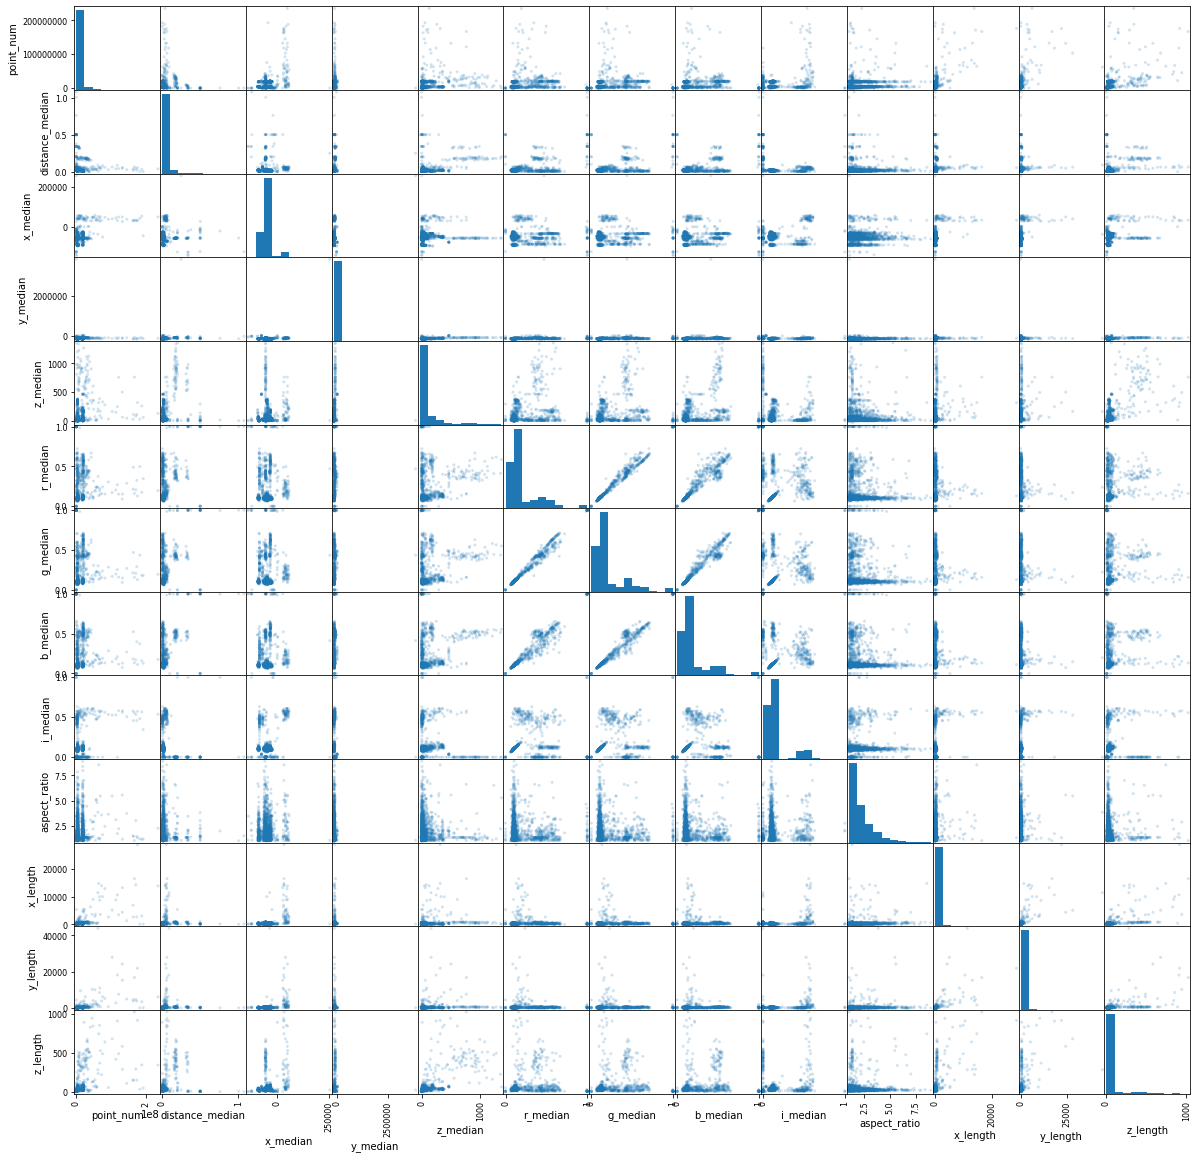

In [34]:
target_colums = [
    'point_num',
    'distance_median',
#     'x_mean',
#     'y_mean',
#     'z_mean',
#     'r_mean',
#     'g_mean',
#     'b_mean',
#     'i_mean',
    'x_median',
    'y_median',
    'z_median',
    'r_median',
    'g_median',
    'b_median',
    'i_median',
    'aspect_ratio',
    'x_length',
    'y_length',
    'z_length',
]
pd.plotting.scatter_matrix(df_pcd_stats[target_colums], alpha=0.2)

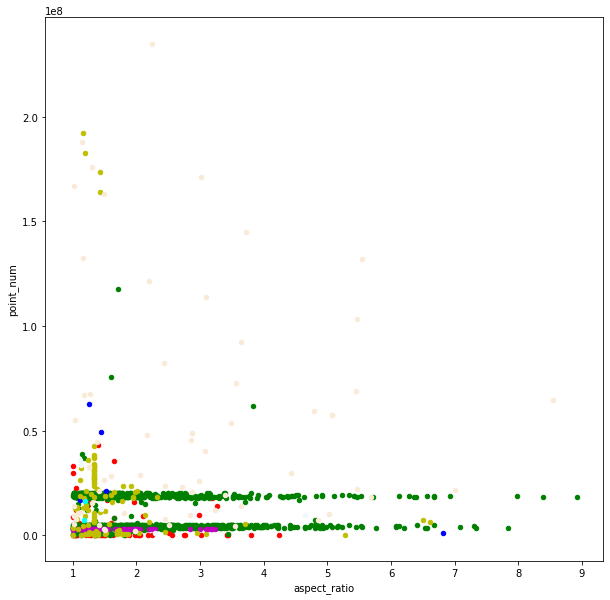

In [78]:
import matplotlib
label_colors = ["r", "g", "b", "c", "m", "y"] + list(matplotlib.colors.cnames.keys())
ax = None
for i, section in enumerate(set(df_pcd_stats['section'])):
    target_df = df_pcd_stats[df_pcd_stats['section']==section]
    ax = target_df.plot(kind='scatter',
                        x='aspect_ratio',
                        y='point_num',
                        c=label_colors[i],
                        ax=ax,
                        legend=True)

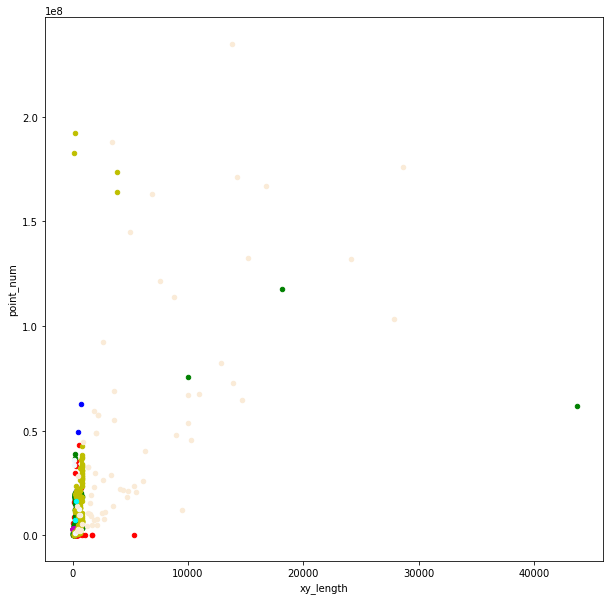

In [79]:
ax = None
for i, section in enumerate(set(df_pcd_stats['section'])):
    target_df = df_pcd_stats[df_pcd_stats['section']==section]
    ax = target_df.plot(kind='scatter',
                      x='xy_length',
                      y='point_num',
                      c=label_colors[i],
                      ax=ax,
                      legend=True)

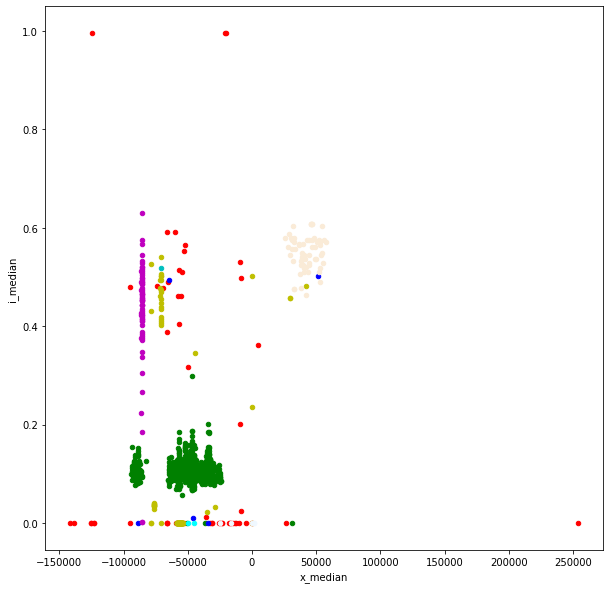

In [92]:
ax = None
for i, section in enumerate(set(df_pcd_stats['section'])):
    target_df = df_pcd_stats[df_pcd_stats['section']==section]
    ax = target_df.plot(kind='scatter',
                      x='x_median',
                      y='i_median',
                      c=label_colors[i],
                      ax=ax,
                      legend=True)